In [1]:
!pip install paddlepaddle
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47979, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 47979 (delta 143), reused 195 (delta 64), pack-reused 47639
Receiving objects: 100% (47979/47979), 345.56 MiB | 16.11 MiB/s, done.
Resolving deltas: 100% (33668/33668), done.
Updating files: 100% (1923/1923), done.


In [3]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import glob

In [4]:
!unzip test_images.zip

Archive:  test_images.zip
   creating: test_images/
  inflating: test_images/map_1.png   
  inflating: test_images/map_2.png   
  inflating: test_images/map_3.png   
  inflating: test_images/map_4.png   
  inflating: test_images/map_5.png   
  inflating: test_images/map_7.png   
  inflating: test_images/map_8.png   
  inflating: test_images/map_10.png  
  inflating: test_images/Cb1.png     
  inflating: test_images/Cb2.png     
  inflating: test_images/Cb3.png     
  inflating: test_images/Cb4.png     
  inflating: test_images/Cb5.png     
  inflating: test_images/Cb6.png     
  inflating: test_images/Cb7.png     
  inflating: test_images/Cb8.png     
  inflating: test_images/Cb9.png     
  inflating: test_images/Cb10.png    


In [5]:
ocr_model = PaddleOCR(lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 487kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:16<00:00, 637kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:06<00:00, 318kiB/s]


[2024/04/18 05:00:01] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='

In [6]:
img_path = '/content/test_images/'

In [7]:
img_paths = glob.glob(img_path + '*.png')

In [8]:
results = {}

In [9]:
map_data = {
    "map_265": {
        "value1":{
            "color": (1,2,3),  # BGR format
            "lower_bound": 10,
            "upper_bound": 40,
        }
    },
}
print(map_data)

# def add_map(map_id, value_id, color, lower_bound, upper_bound):
#     map_data[map_id][value_id] = {
#         "color": color,
#         "lower_bound": lower_bound,
#         "upper_bound": upper_bound
#     }

# def add_new_map(map_id, value_id, color, lower_bound, upper_bound):
#     map_data[map_id][value_id] = {
#         "color": color,
#         "lower_bound": lower_bound,
#         "upper_bound": upper_bound
#     }

def add_new_element(map_data, map_num, value_id, color, lower_bound, upper_bound):
  if map_num not in map_data:
    map_data[map_num] = {}
  if value_id not in map_data[map_num]:
    map_data[map_num][value_id] = {
        "color": color,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "value": (lower_bound+upper_bound)//2,
    }

{'map_265': {'value1': {'color': (1, 2, 3), 'lower_bound': 10, 'upper_bound': 40}}}


In [10]:
# Function to check if a string is a digit
def is_digit(s):
    return s.isdigit()

# Function to convert bound variables to doubles and extract units
def convert_to_doubles(lower_bound, upper_bound):
    # Check if last character of lower_bound is not a digit
    if not is_digit(lower_bound[-1]):
        units = lower_bound[-1]
        lower_bound = float(lower_bound[:-1])
    else:
        units = 'u'
        lower_bound = float(lower_bound)

    # Check if last character of upper_bound is not a digit
    if not is_digit(upper_bound[-1]):
        units = upper_bound[-1]
        upper_bound = float(upper_bound[:-1])
    else:
        units = 'u'
        upper_bound = float(upper_bound)

    return lower_bound, upper_bound, units

[2024/04/18 05:14:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/04/18 05:14:26] ppocr DEBUG: dt_boxes num : 5, elapsed : 0.13202428817749023
[2024/04/18 05:14:26] ppocr DEBUG: rec_res num  : 5, elapsed : 0.5454375743865967
[2024/04/18 05:14:26] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/04/18 05:14:27] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.11854767799377441
[2024/04/18 05:14:28] ppocr DEBUG: rec_res num  : 10, elapsed : 1.0368907451629639
[2024/04/18 05:14:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/04/18 05:14:28] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.17058730125427246
[2024/04/18 05:14:28] ppocr DEBUG: rec_res num  : 8, elapsed : 0.6909830570220947
[2024/04/18 05:14:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during

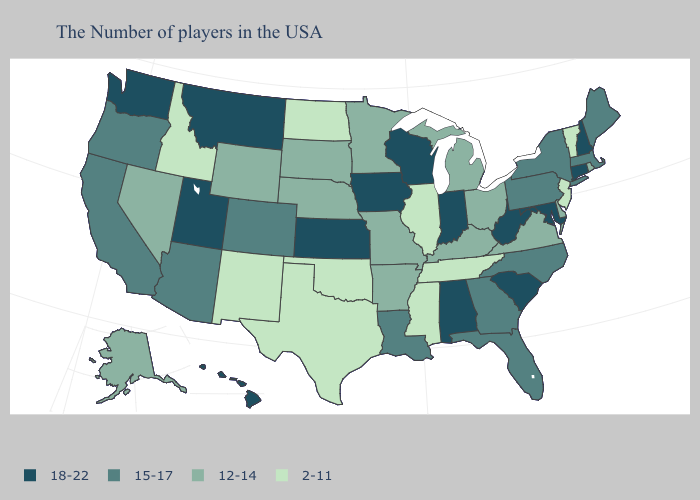

OCR results for /content/test_images/Cb7.png:
Text: 7M, Bounding Box: 653.0, 75.0, 18.0, 12.0
Text: 6.5M, Bounding Box: 652.0, 125.0, 32.0, 14.0
Text: 6M, Bounding Box: 653.0, 176.0, 19.0, 12.0
Text: 5.5M, Bounding Box: 652.0, 226.0, 32.0, 13.0
Text: 5M, Bounding Box: 652.0, 277.0, 21.0, 14.0
Text: 4.5M, Bounding Box: 652.0, 326.0, 32.0, 15.0
Text: 4M, Bounding Box: 652.0, 380.0, 20.0, 12.0
Text: 3.5M, Bounding Box: 651.0, 429.0, 33.0, 13.0


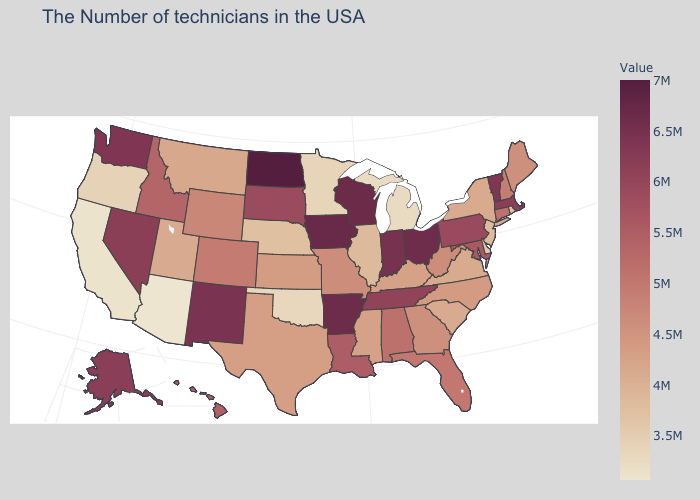

OCR results for /content/test_images/Cb3.png:
Text: 40, Bounding Box: 667.0, 114.0, 17.0, 13.0
Text: 35, Bounding Box: 667.0, 183.0, 17.0, 12.0
Text: 30, Bounding Box: 666.0, 248.0, 20.0, 16.0
Text: 25, Bounding Box: 667.0, 317.0, 17.0, 13.0
Text: 20, Bounding Box: 667.0, 386.0, 17.0, 12.0
Text: 15, Bounding Box: 667.0, 453.0, 17.0, 14.0


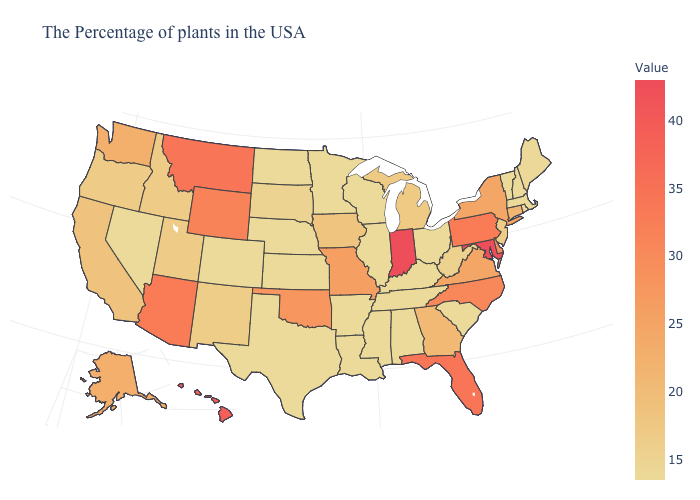

OCR results for /content/test_images/Cb6.png:
Text: 4000, Bounding Box: 652.0, 81.0, 33.0, 14.0
Text: 3500, Bounding Box: 652.0, 135.0, 32.0, 13.0
Text: 3000, Bounding Box: 652.0, 188.0, 32.0, 14.0
Text: 2500, Bounding Box: 652.0, 243.0, 32.0, 14.0
Text: 2000, Bounding Box: 652.0, 297.0, 32.0, 14.0
Text: 1500, Bounding Box: 652.0, 351.0, 33.0, 13.0
Text: 1000, Bounding Box: 652.0, 404.0, 33.0, 14.0
Text: 500, Bounding Box: 652.0, 458.0, 26.0, 15.0


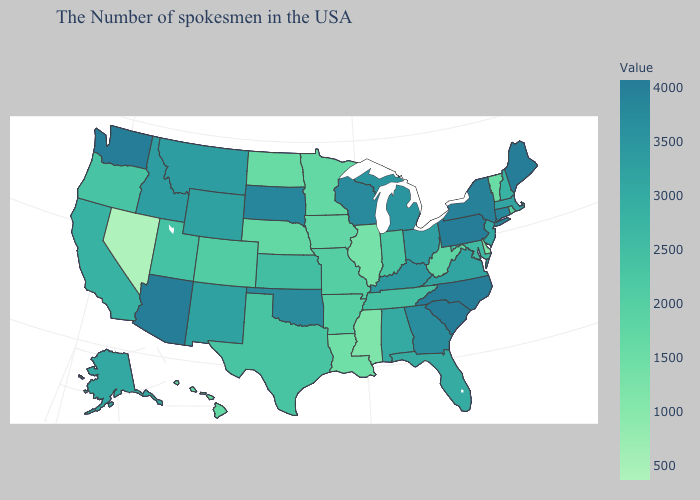

OCR results for /content/test_images/map_4.png:
Text: 40.3%-50.1%, Bounding Box: 592.0, 389.0, 93.0, 13.0
Text: 51.2%-61.0%, Bounding Box: 591.0, 407.0, 93.0, 14.0
Text: 62.0%-71.6%, Bounding Box: 591.0, 428.0, 93.0, 13.0
Text: 72.5%-82.5%, Bounding Box: 592.0, 448.0, 92.0, 14.0
Text: N/A, Bounding Box: 590.0, 469.0, 27.0, 14.0


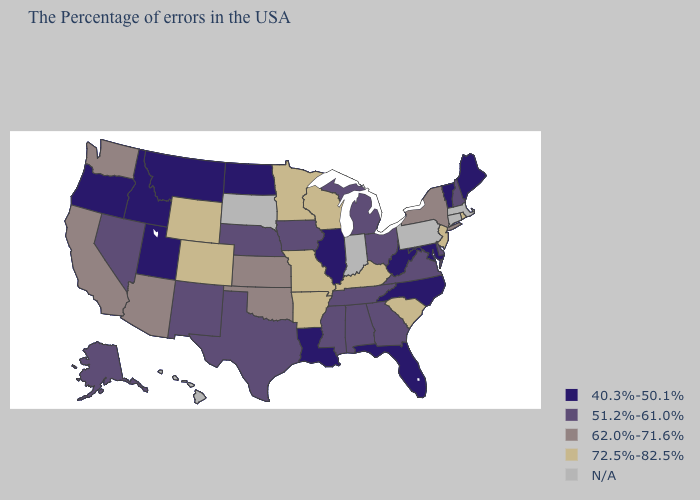

OCR results for /content/test_images/map_5.png:
Text: 44750-133420, Bounding Box: 577.0, 233.0, 99.0, 14.0
Text: 141467-218509, Bounding Box: 579.0, 254.0, 104.0, 13.0
Text: 225260-264526, Bounding Box: 578.0, 273.0, 106.0, 14.0
Text: 271741-440285, Bounding Box: 576.0, 293.0, 108.0, 14.0


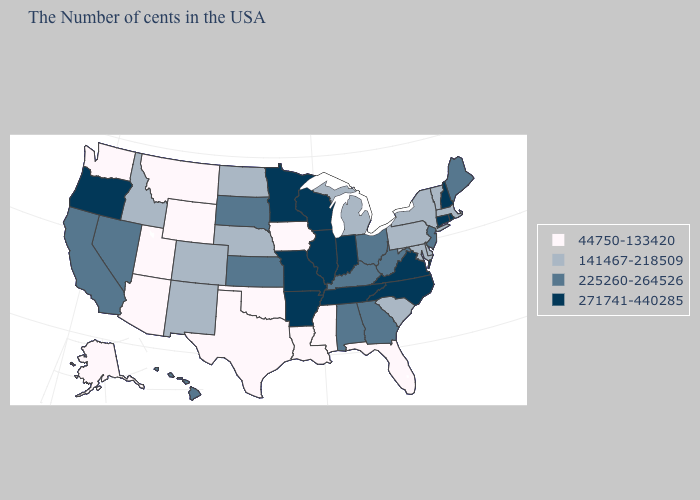

OCR results for /content/test_images/map_3.png:
Text: 67.3%-67.7%, Bounding Box: 51.0, 466.0, 95.0, 14.0
Text: 66.9%-67.2%, Bounding Box: 189.0, 466.0, 93.0, 14.0


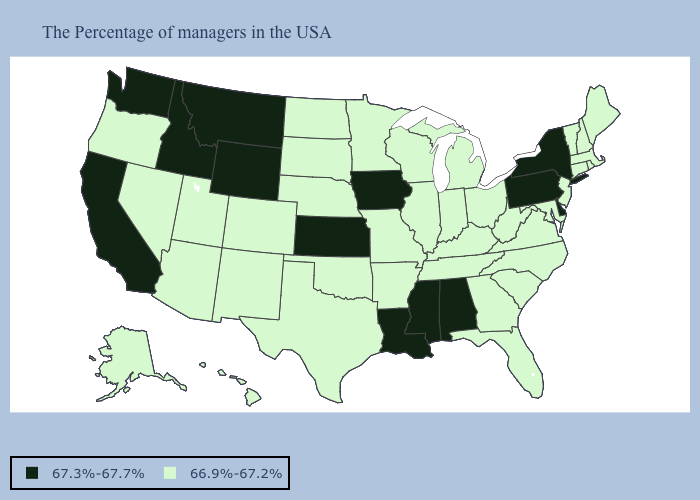

OCR results for /content/test_images/map_2.png:
Text: 29.5%-30.1%, Bounding Box: 51.0, 467.0, 95.0, 12.0
Text: 28.9%-29.3%, Bounding Box: 189.0, 467.0, 94.0, 12.0
Text: 28.1%-28.5%, Bounding Box: 327.0, 469.0, 94.0, 10.0
Text: 27.3%-28.0%, Bounding Box: 465.0, 469.0, 94.0, 10.0
Text: N/A, Bounding Box: 602.0, 468.0, 27.0, 12.0


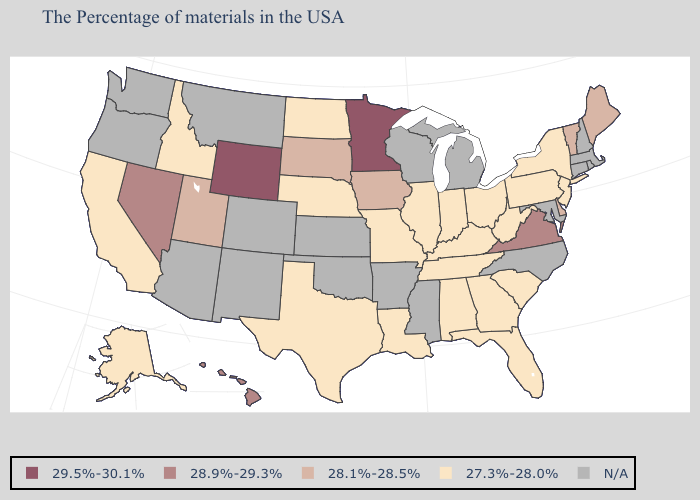

OCR results for /content/test_images/Cb2.png:
Text: 80, Bounding Box: 667.0, 116.0, 17.0, 13.0
Text: 70, Bounding Box: 667.0, 193.0, 17.0, 13.0
Text: 60, Bounding Box: 667.0, 271.0, 17.0, 12.0
Text: 50, Bounding Box: 666.0, 346.0, 20.0, 15.0
Text: 40, Bounding Box: 667.0, 426.0, 18.0, 12.0


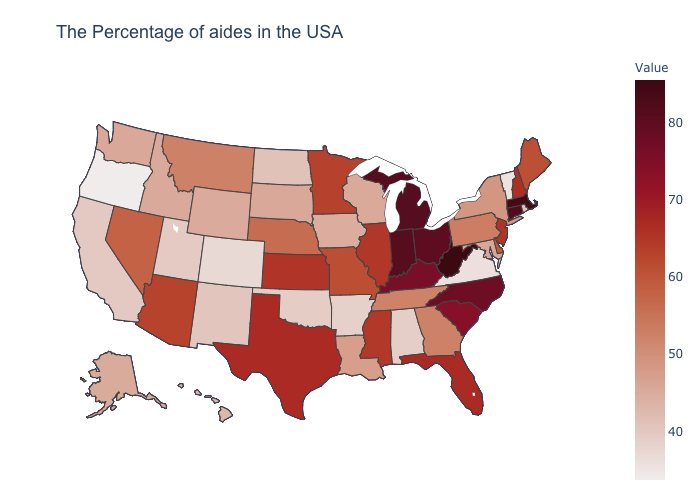

OCR results for /content/test_images/map_8.png:
Text: 78-86, Bounding Box: 51.0, 468.0, 40.0, 11.0
Text: 70-76, Bounding Box: 135.0, 468.0, 41.0, 11.0
Text: 61-69, Bounding Box: 219.0, 467.0, 41.0, 13.0


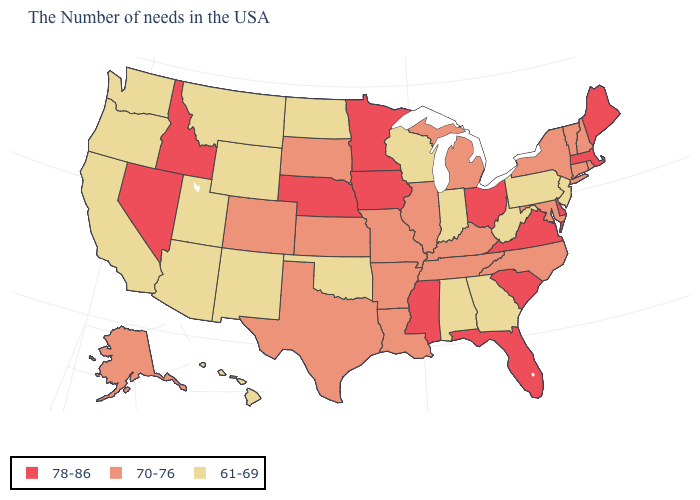

OCR results for /content/test_images/Cb8.png:
Text: 46, Bounding Box: 667.0, 79.0, 17.0, 12.0
Text: 44, Bounding Box: 667.0, 130.0, 17.0, 13.0
Text: 42, Bounding Box: 667.0, 182.0, 17.0, 12.0
Text: 40, Bounding Box: 667.0, 232.0, 18.0, 13.0
Text: 38, Bounding Box: 667.0, 283.0, 17.0, 13.0
Text: 36, Bounding Box: 666.0, 334.0, 20.0, 16.0
Text: 34, Bounding Box: 667.0, 386.0, 17.0, 12.0
Text: 32, Bounding Box: 667.0, 437.0, 17.0, 12.0


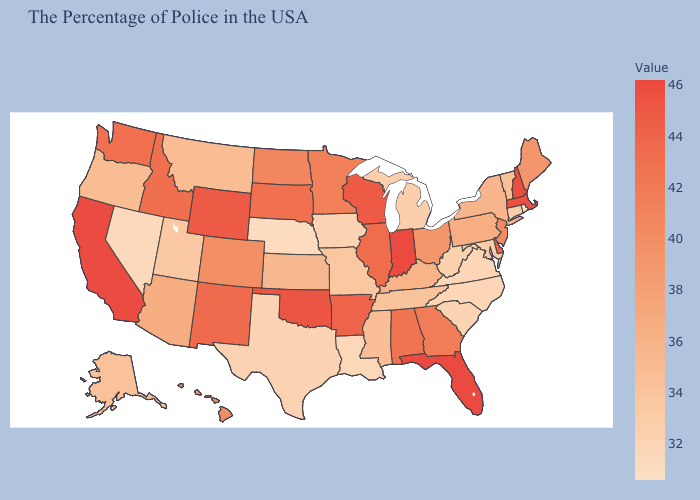

OCR results for /content/test_images/Cb9.png:
Text: 22, Bounding Box: 667.0, 119.0, 17.0, 13.0
Text: 20, Bounding Box: 667.0, 169.0, 17.0, 13.0
Text: 18, Bounding Box: 667.0, 221.0, 17.0, 12.0
Text: 16, Bounding Box: 667.0, 271.0, 17.0, 13.0
Text: 14, Bounding Box: 667.0, 321.0, 17.0, 13.0
Text: 12, Bounding Box: 667.0, 372.0, 17.0, 13.0
Text: 10, Bounding Box: 667.0, 424.0, 17.0, 12.0
Text: 8, Bounding Box: 667.0, 475.0, 9.0, 9.0


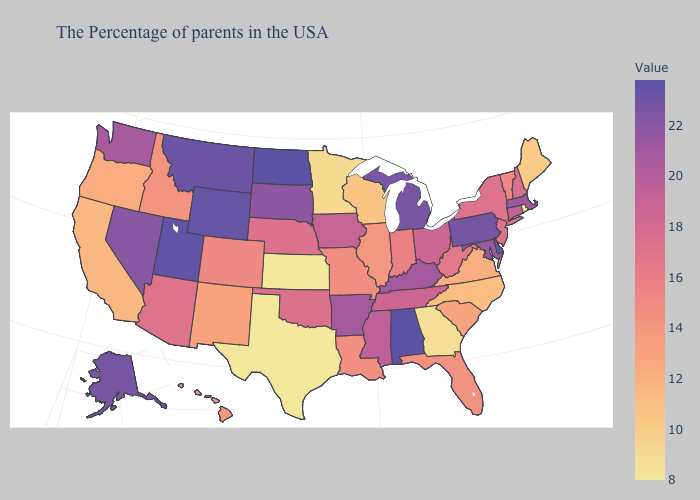

OCR results for /content/test_images/Cb5.png:
Text: 36, Bounding Box: 666.0, 104.0, 18.0, 12.0
Text: 35, Bounding Box: 667.0, 146.0, 17.0, 13.0
Text: 34, Bounding Box: 667.0, 189.0, 17.0, 13.0
Text: 33, Bounding Box: 667.0, 231.0, 17.0, 14.0
Text: 32, Bounding Box: 667.0, 274.0, 17.0, 14.0
Text: 31, Bounding Box: 667.0, 317.0, 17.0, 14.0
Text: 30, Bounding Box: 667.0, 361.0, 17.0, 13.0
Text: 29, Bounding Box: 667.0, 403.0, 17.0, 14.0
Text: 28, Bounding Box: 667.0, 447.0, 17.0, 13.0


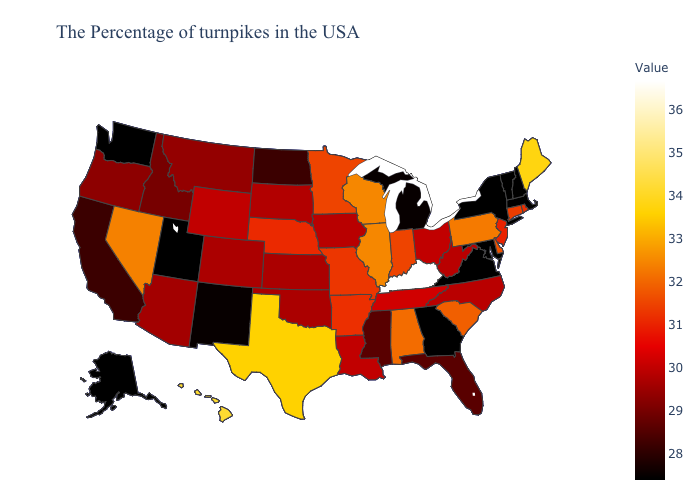

OCR results for /content/test_images/map_10.png:
Text: 7920264-8002936, Bounding Box: 560.0, 60.0, 123.0, 13.0
Text: 7811458-7859166, Bounding Box: 561.0, 81.0, 122.0, 13.0
Text: 7668882-7761001, Bounding Box: 560.0, 100.0, 122.0, 13.0
Text: 7548477-7658039, Bounding Box: 561.0, 121.0, 122.0, 13.0


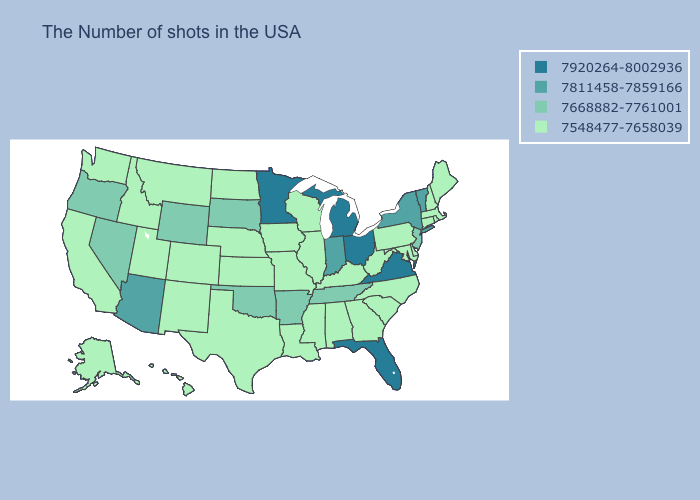

OCR results for /content/test_images/map_7.png:
Text: 667891-674798, Bounding Box: 51.0, 468.0, 105.0, 12.0
Text: 660425-667289, Bounding Box: 201.0, 468.0, 106.0, 12.0
Text: N/A, Bounding Box: 351.0, 469.0, 26.0, 11.0


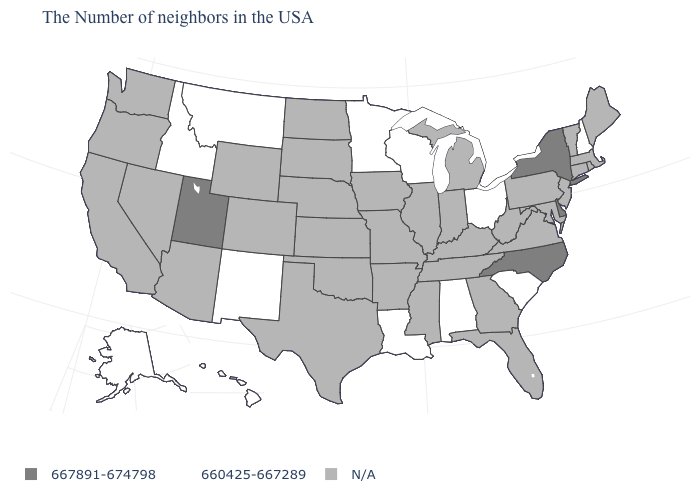

OCR results for /content/test_images/Cb10.png:
Text: 70, Bounding Box: 669.0, 74.0, 15.0, 12.0
Text: 65, Bounding Box: 667.0, 139.0, 17.0, 12.0
Text: 60, Bounding Box: 667.0, 202.0, 18.0, 13.0
Text: 55, Bounding Box: 667.0, 267.0, 17.0, 13.0
Text: 50, Bounding Box: 667.0, 331.0, 18.0, 13.0
Text: 45, Bounding Box: 667.0, 396.0, 17.0, 13.0
Text: 40, Bounding Box: 668.0, 458.0, 18.0, 13.0


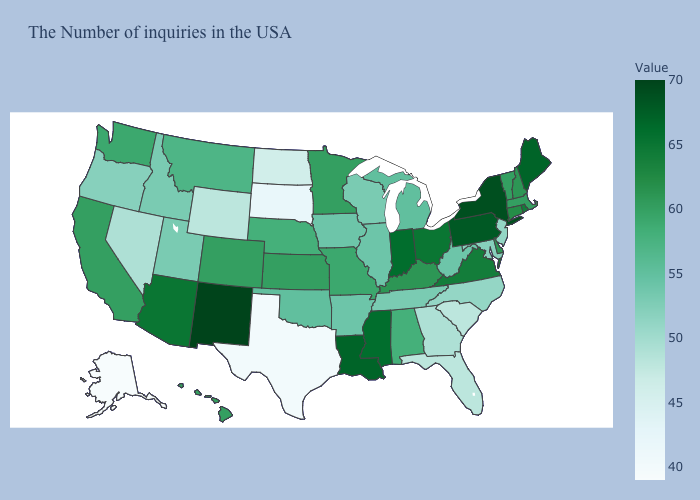

OCR results for /content/test_images/Cb4.png:
Text: 400k, Bounding Box: 652.0, 107.0, 32.0, 14.0
Text: 395k, Bounding Box: 652.0, 174.0, 32.0, 14.0
Text: 390k, Bounding Box: 652.0, 235.0, 32.0, 14.0
Text: 385k, Bounding Box: 652.0, 303.0, 33.0, 13.0
Text: 380k, Bounding Box: 652.0, 365.0, 32.0, 14.0
Text: 375k, Bounding Box: 651.0, 431.0, 33.0, 13.0


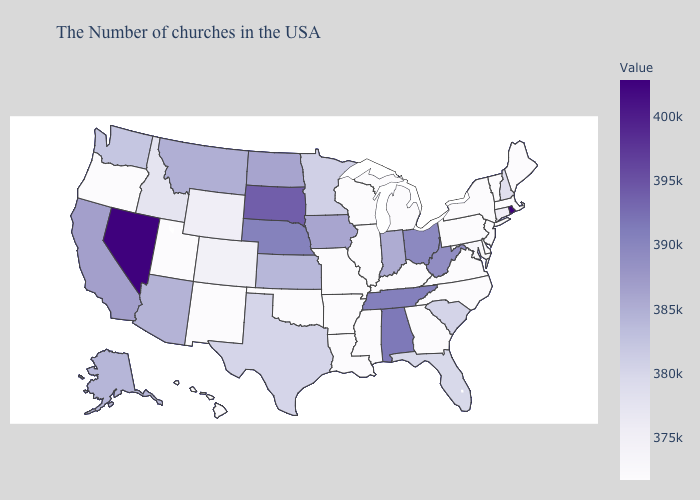

OCR results for /content/test_images/Cb1.png:
Text: 54, Bounding Box: 667.0, 106.0, 17.0, 14.0
Text: 52, Bounding Box: 667.0, 149.0, 17.0, 14.0
Text: 50, Bounding Box: 667.0, 191.0, 17.0, 14.0
Text: 48, Bounding Box: 667.0, 235.0, 17.0, 13.0
Text: 46, Bounding Box: 667.0, 277.0, 17.0, 13.0
Text: 44, Bounding Box: 667.0, 320.0, 17.0, 13.0
Text: 42, Bounding Box: 667.0, 363.0, 17.0, 13.0
Text: 40, Bounding Box: 667.0, 405.0, 18.0, 13.0
Text: 38, Bounding Box: 668.0, 445.0, 19.0, 15.0


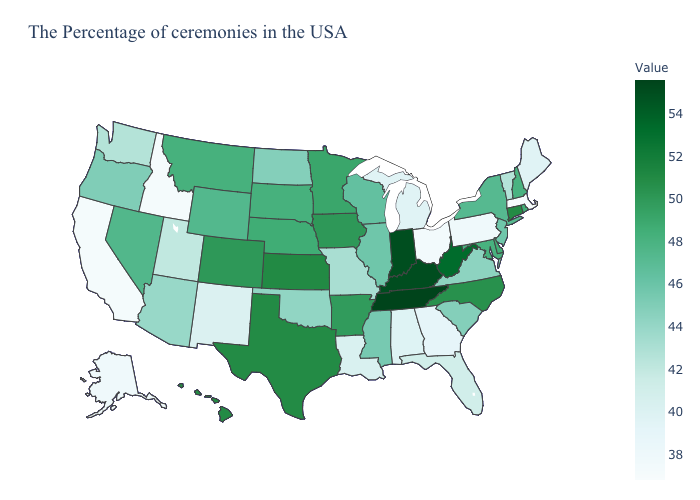

[['map_1', 1, 29, 79, 96, 20.0, 'u'], ['map_1', 2, 89, 132, 132, 16.0, 'u'], ['map_1', 3, 146, 181, 166, 13.0, 'u'], ['map_1', 4, 197, 226, 196, 6.5, 'u'], ['Cb7', 1, 84, 31, 63, 7.0, 'M'], ['Cb7', 2, 118, 49, 78, 6.5, 'M'], ['Cb7', 3, 217, 217, 217, 6.0, 'M'], ['Cb7', 4, 173, 93, 100, 5.5, 'M'], ['Cb7', 5, 194, 120, 112, 5.0, 'M'], ['Cb7', 6, 207, 148, 126, 4.5, 'M'], ['Cb7', 7, 218, 178, 149, 4.0, 'M'], ['Cb7', 8, 228, 204, 176, 3.5, 'M'], ['Cb3', 1, 242, 90, 87, 40.0, 'u'], ['Cb3', 2, 248, 114, 86, 35.0, 'u'], ['Cb3', 3, 247, 139, 90, 30.0, 'u'], ['Cb3', 4, 244, 164, 101, 25.0, 'u'], ['Cb3', 5, 240, 188, 119, 20.0, 'u'], ['Cb3', 6, 237, 211, 145, 15.0, 'u'], ['Cb6', 1, 37, 127, 152, 4000.0, 'u'], ['Cb6', 2, 43, 149, 159, 3500.0, 'u'], ['Cb6', 3, 52, 170, 162, 3000.0, 'u'], ['Cb6', 4, 67, 190, 163, 2500.0, 'u'], ['Cb6', 5, 86, 207, 163, 2000.0, 'u'], ['Cb6', 6, 107, 220, 166, 1500.0, 'u'], ['Cb6', 7, 135, 231, 171, 1000.0, 'u'], ['Cb6', 8, 167, 239, 184, 500.0, 'u'], ['map_4', 1, 200

In [14]:
from google.colab.patches import cv2_imshow
import logging

# Suppress PaddleOCR warning and debug messages
logging.getLogger("PaddleOCR").setLevel(logging.ERROR)

for img_path in img_paths:
    result = ocr_model.ocr(img_path)
    results[img_path] = result

def num_there(s):
    return any(i.isdigit() for i in s)

def contains_hyphen(text):
    """
    Check if the given text contains the character '-'.

    Args:
        text (str): The text to check.

    Returns:
        bool: True if the text contains '-', False otherwise.
    """
    return '-' in text

# numerical_text_info = []
complete_data = []
# j=0

for img_path, result in results.items():
  numerical_text_info = []
  print(f"OCR results for {img_path}:")
  image = cv2.imread(img_path)
  for line in result:
    # print(line)
    # print()
    for word in line:
      # print(word[0][0])
      # print(word[0][0][0])
      # print(word[1][0])
      text = word[1][0]
      x, y, w, h = word[0][0][0], word[0][0][1], abs(word[0][0][0]-word[0][1][0]), abs(word[0][1][1]-word[0][2][1])
      # print(x, y, w, h)
      #  and contains_hyphen(text)==1
      if num_there(text)==1 or text=="N/A":
        # print(type(text))
        # print(f"Text: {text}, Bounding Box: {x}, {y}, {w}, {h}")
        # x=int(x)
        # y=int(x)
        # w=int(w)
        # h=int(h)
        # cv2.rectangle(image, (int(x), int(y)), (int(x) + int(w), int(y) + int(h)), (0, 255, 0), 2)

        x1 = int(x)
        y1 = int(y+h//2)
        x2 = int(x)
        y2 = int(y +h//2- 1)
        # x1 = x
        # x2 = x
        # y1 = y + h // 2
        # y2 = y + h // 2 - 1

        while all(image[y1, x1]==image[y2, x2]):
            x2-=1

        # x2-=5
        x3=x2
        # cv2.rectangle(image, (x2, y2), (x2+5, y2+5), (0, 255, 0), 2)

        while all(image[y1, x1]==image[y2, x3]):
           x3-=1

        x2 = (x2+x3)//2

        color = image[y2,x2]

        blue, green, red = color
        # print(f"Blue: {blue}, Green: {green}, Red: {red}")

        # values = text.split("-")
        numerical_text_info += [text] + [red, green, blue]
        # print(numerical_text_info)
        # numerical_text_info += [text] + [blue, green, red]
        # print(numerical_text_info)

        # color = image[y,x-25] # have to edit this to get the exact colour.
        # print(f'Color at ({x}, {y}): {color}')

  cv2_imshow(image)

  i=0
  value_id = 0
  while i<len(numerical_text_info):
    value_id += 1

    if numerical_text_info[i]!="N/A":
      values = numerical_text_info[i].split("-")
      # print(values)

      # print(type(numerical_text_info[i]))
      if len(values)>1:
        lower_bound = values[0]
        upper_bound = values[1]
      else:
        lower_bound = values[0]
        upper_bound = values[0]

      converted_lower_bound, converted_upper_bound, units = convert_to_doubles(lower_bound, upper_bound)
      info = [value_id, numerical_text_info[i+1], numerical_text_info[i+2], numerical_text_info[i+3], (converted_lower_bound+converted_upper_bound)/2, units]

    else:
      values = "N/A"
      info = [value_id, numerical_text_info[i+1], numerical_text_info[i+2], numerical_text_info[i+3], values, ""]
    # print(info)

    # add_map(map_id, value_id, (blue, green, red), lower_bound, upper_bound)
    # print(map_data)

    # map_name = "map_287"
    map_name = img_path.split("/")[-1].split(".")[0]
    info = [map_name] + info
    complete_data += [info]

    # formatted_data = [data[0][0]]  # First element is the map name
    # for item in data:
    #   formatted_data.append(item[1:])
    # print(info)
    # add_new_element(map_data, map_name, value_id, (blue, green, red), lower_bound, upper_bound)
    # if map_name in map_data:
    #     # map_data[map_name][value_id] = {
    #     #     "color": (blue, green, red),
    #     #     "lower_bound": lower_bound,
    #     #     "upper_bound": upper_bound,
    #     # }
    # else:
    #     map_data[map_name] = {
    #         value_id: {
    #             "color": (blue, green, red),
    #             "lower_bound": lower_bound,
    #             "upper_bound": upper_bound,
    #         }
    #     }

    i+=4

# print(map_data)
print(complete_data)
  # print(color)
  # cv2.rectangle(images, (x2, y2), (x2+5, y2+5), (0, 255, 0), 2)

# os.remove(filename)
# # cv2_imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
# cv2_imshow(images)

In [15]:
with open('/content/output.txt', 'w') as f:
    # Loop through the list and write each element to the file
    for item in complete_data:
        f.write(str(item) + '\n')

In [16]:
results

{'/content/test_images/map_1.png': [[[[[58.0, 23.0],
     [321.0, 23.0],
     [321.0, 40.0],
     [58.0, 40.0]],
    ('The Number of players in the USA', 0.9998407959938049)],
   [[[50.0, 468.0], [90.0, 468.0], [90.0, 482.0], [50.0, 482.0]],
    ('18-22', 0.9946231842041016)],
   [[[133.0, 469.0], [174.0, 469.0], [174.0, 482.0], [133.0, 482.0]],
    ('15-17', 0.9942367672920227)],
   [[[217.0, 469.0], [259.0, 469.0], [259.0, 482.0], [217.0, 482.0]],
    ('12-14', 0.9960162043571472)],
   [[[300.0, 469.0], [333.0, 469.0], [333.0, 482.0], [300.0, 482.0]],
    ('2-11', 0.9957793354988098)]]],
 '/content/test_images/Cb7.png': [[[[[43.0, 8.0],
     [364.0, 8.0],
     [364.0, 24.0],
     [43.0, 24.0]],
    ('The Number of technicians in the USA', 0.9627320766448975)],
   [[[618.0, 61.0], [655.0, 61.0], [655.0, 74.0], [618.0, 74.0]],
    ('Value', 0.9062236547470093)],
   [[[653.0, 75.0], [671.0, 75.0], [671.0, 87.0], [653.0, 87.0]],
    ('7M', 0.9993629455566406)],
   [[[652.0, 125.0], [684.